In [99]:
"""
level 1
Script 2: TET (TET Data Extraction)
TET data extractions
Plotting and saving the figures
"""
"""
Things to do before running:
1. Open the App data and copy-paste the required TET data (daytime) into a new blank excel sheet. Go to Data > Text to Columns > Delimited > Comma (only) > Finish
2. Save the file as TET_GER_xl.xlsx (if participant recruited from Germany). Or TET_UK_xl.xlsx (if participant from the UK)
"""

'\nThings to do before running:\n1. Open the App data and copy-paste the required TET data (daytime) into a new blank excel sheet. Go to Data > Text to Columns > Delimited > Comma (only) > Finish\n2. Save the file as TET_GER_xl.xlsx (if participant recruited from Germany). Or TET_UK_xl.xlsx (if participant from the UK)\n'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
#pip install openpyxl -> run if not installed. Needed for excel files

In [ ]:
"""
Part 1
Extraction of TET Diary data and formatting into separate excel files (corrected) for plotting at all levels of the code pipeline
"""

In [253]:
parentfolder = input("enter path to participant folder for the required day: ") #eg: Documents\LMU_Stream_ASD_003\10092024_n01_11092024_d

enter path to participant folder for the required day:  G:\Ananya Rao\Documents\LMU_Stream_ASD_003\26092024_n16_27092024_d


In [241]:
"""
names of folders to be used
"""
folder1 = 'empatica'
folder2 = 'saved_figures'

folder11 = 'aggr_p_min'
folder12 = 'avro_files'
folder13 = 'avro2csv'

In [254]:
"""importing TET data"""
df = pd.read_excel(os.path.join(parentfolder, "TET_GER_xl.xlsx"))

In [255]:
df.head(7)

,2024-09-27 23:38:45.289 nachm.,MENÜ,Press button: Tägliche Erfahrungen,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2024-09-27 23:38:46.604 nachm.,Questionnaires - TETDay,Press button: TET,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-09-27 23:38:47.501 nachm.,TET Tag,Swipe from page 1 to 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-09-27 23:38:54.949 nachm.,TET – Tag,Erasing graph,Wie wach fühlten Sie sich im Tagesverlauf?,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-09-27 23:38:57.666 nachm.,TET – Tag,Erasing graph,Wie wach fühlten Sie sich im Tagesverlauf?,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-09-27 23:39:02.963 nachm.,TET – Tag,Erasing graph,Wie wach fühlten Sie sich im Tagesverlauf?,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-09-27 23:39:05.611 nachm.,TET – Tag,Erasing graph,Wie wach fühlten Sie sich im Tagesverlauf?,NaN,NaN,NaN,NaN,NaN,NaN
6,2024-09-27 23:39:11.175 nachm.,TET – Tag,Erasing graph,Wie wach fühlten Sie sich im Tagesverlauf?,NaN,NaN,NaN,NaN,NaN,NaN


In [256]:
"""
DEBUG BLOCK 1

#if there are any other combinations of column names other than the ones coded for in the below cells, provision to change it to one of those instead of writing even more code to accommodate them all

Some examples below: 

df.rename(columns={'Questionnaires - TETDay': 'MENÜ', 'Press button: TET': 'Press button: Tägliche Erfahrungen'}, inplace=True) #replace the keys in this with the new unseen column names that you want to replace
df.head(2)



df.rename(columns={'Category': 'MENÜ', 'Action': 'Press button: Tägliche Erfahrungen'}, inplace=True) #replace the keys in this with the new unseen column names that you want to replace
df.head(2)
"""

#additional inconsistency: if some excel sheets have column rows - Time	Category	Action	Question	Answer	Point ID	x value	y value	QuestionnairesValues	
#it means that the row with 2024-09-12 23:07:22.825 nachm.	MENÜ	Press button: Tägliche Erfahrungen	is somewhere down the dataframe/sheet. For ease of execution of all the code blocks below, and to avoid adding additionl check statements, discard all previous rows until the 2024-09-12 23:07:22.825 nachm.	MENÜ	Press button: Tägliche Erfahrungen row
maskDebug = (df.iloc[:,1]== 'MENÜ') & (df.iloc[:, 2] == 'Press button: Tägliche Erfahrungen')
reqRow = df.index[maskDebug].tolist()
if reqRow: #so that all of this is only done if the additional inconsistency exists, if not, it is skipped
    reqRow = reqRow[0]
    new_header = df.iloc[reqRow]
    df = df.iloc[reqRow+1:, :]
    df.columns = new_header
    df = df.reset_index(drop=True)
    
    cols = list(df.columns)
    
    start = 3  #positional index where Unnamed: 3 should start
    end   = 10 #up to Unnamed: 9
    
    for i, cpos in enumerate(range(start, end), start=3):
        if pd.isna(cols[cpos]):
            cols[cpos] = f"Unnamed: {i}"
    
    df.columns = cols

In [257]:
df.head(7)

,2024-09-27 23:38:45.289 nachm.,MENÜ,Press button: Tägliche Erfahrungen,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2024-09-27 23:38:46.604 nachm.,Questionnaires - TETDay,Press button: TET,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-09-27 23:38:47.501 nachm.,TET Tag,Swipe from page 1 to 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-09-27 23:38:54.949 nachm.,TET – Tag,Erasing graph,Wie wach fühlten Sie sich im Tagesverlauf?,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-09-27 23:38:57.666 nachm.,TET – Tag,Erasing graph,Wie wach fühlten Sie sich im Tagesverlauf?,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-09-27 23:39:02.963 nachm.,TET – Tag,Erasing graph,Wie wach fühlten Sie sich im Tagesverlauf?,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-09-27 23:39:05.611 nachm.,TET – Tag,Erasing graph,Wie wach fühlten Sie sich im Tagesverlauf?,NaN,NaN,NaN,NaN,NaN,NaN
6,2024-09-27 23:39:11.175 nachm.,TET – Tag,Erasing graph,Wie wach fühlten Sie sich im Tagesverlauf?,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
# Define the search expressions - to extract and partition all the x and y values by question

#where expr and expr2 are found in the same row i.e, the rows containing the questions
if 'MENÜ' in df.columns:
    expr = 'TET – Tag';
    # to avoid duplicates in question indices - that could happen if the participant erased graph data instead of submitting the graph
    expr2 = 'Submit rating'; 
    # to make sure at least one data point has been entered by the participant
    expr3 = 'Saved drawing data'

    mask = (df['MENÜ'] == expr) & (df['Press button: Tägliche Erfahrungen'] == expr2)
    indices = df.index[mask].tolist()
    print("Indices where both conditions are met:", indices)
    for i in indices:
        if df['Press button: Tägliche Erfahrungen'].iloc[i+1] != expr3:
            print("Warning! Below this index, no x and y data may have been submitted! -> ", i) #check the indices (or index+2) in the corresponding excel sheet and investigate the issue. If no issue (for example after question "Wie sehr haben Sie sich Sorgen oder Gedanken über vergangene Erfahrungen / Ereignisse gemacht?", there is usually one empty row), carry on/adjust accordingly
        if i+1>=len(df):
            print("Warning! Below this last index, no x and y data may have been submitted! -> ", i)
else:
    expr = 'Daily Experience';
    # to avoid duplicates in question indices - that could happen if the participant erased graph data instead of submitting the graph
    expr2 = 'Submit rating'; 
    # to make sure at least one data point has been entered by the participant
    expr3 = 'Saved drawing data'
    
    mask = (df['Category'] == expr) & (df['Action'] == expr2)
    indices = df.index[mask].tolist()
    print("Indices where both conditions are met:", indices)
    #sometimes, even if the above conditions are met, x and y data are not found below. To check for that, code below:
    for i in indices:
        if i+1<len(df) and df['Action'].iloc[i+1] != expr3:
            print("Warning! Below this index, no x and y data may have been submitted! -> ", i) #check the indices (or index+2) in the corresponding excel sheet and investigate the issue and adjust accordingly. If no issue (for example after question "Wie sehr haben Sie sich Sorgen oder Gedanken über vergangene Erfahrungen / Ereignisse gemacht?", there is usually one empty row), carry on
        if i+1>=len(df):
            print("Warning! Below this last index, no x and y data may have been submitted! -> ", i)
            

Indices where both conditions are met: [7, 266, 336, 381, 424, 471, 571, 627, 668, 797, 913]
Warning! Below this index, no x and y data may have been submitted! ->  571
Warning! Below this index, no x and y data may have been submitted! ->  913


In [259]:
"""for ease of reading the questions, which have been separated into bits because of commas, trying to make one single column concatenating the text in all these separate columns"""

if 'MENÜ' in df.columns:
    start_column_index = df.columns.get_loc('Unnamed: 4')
    for col in df.columns[start_column_index:]:
        df['Unnamed: 3'] = df.apply(lambda row: row['Unnamed: 3'] + " " + row[col] if pd.notna(row[col]) and isinstance(row[col], str) else row['Unnamed: 3'], axis=1)

    print(df['Unnamed: 3'].iloc[indices])
    
else:    
    start_column_index = df.columns.get_loc('Answer')
    for col in df.columns[start_column_index:]:
        df['Question'] = df.apply(lambda row: row['Question'] + " " + row[col] if pd.notna(row[col]) and isinstance(row[col], str) else row['Question'], axis=1)

    print(df['Question'].iloc[indices])

7             Wie wach fühlten Sie sich im Tagesverlauf?
266    Wie gelangweilt fühlten Sie sich im Tagesverlauf?
336    Wie sehr haben Sie gezielt versucht  einen ode...
381    Wie sehr haben Sie versucht  soziale Interakti...
424    Wie sehr haben Sie sich über den Tag hinweg kö...
471    Wie sehr haben Sie sich Sorgen gemacht über ge...
571    Wie sehr haben Sie sich Sorgen oder Gedanken ü...
627    Wie sehr haben Sie sich im Tagesverlauf gestre...
668    Wie sehr haben Sie sich im Tagesverlauf gestre...
797    Wie sehr haben Sie körperliche Schmerzen im Ta...
913    Falls Sie eine zusätzliche individuelle Erfahr...
Name: Unnamed: 3, dtype: object


In [260]:
#Question list
#question list varies depending on location of collection and app language version used
if 'MENÜ' in df.columns:
    q1 = 'Wie wach fühlten Sie sich im Tagesverlauf?'
    q2 = 'Wie gelangweilt fühlten Sie sich im Tagesverlauf?'
    q3 = 'Wie sehr haben Sie gezielt versucht  einen oder verschiedene Sinneseindrücke zu vermeiden (z.B. Geruch  Geschmack  Geräusche)?'
    q4 = 'Wie sehr haben Sie versucht  soziale Interaktion zu vermeiden (virtuell und/oder persönlich)?'
    q5 = 'Wie sehr haben Sie sich über den Tag hinweg körperlich angespannt gefühlt?'
    q6 = 'Wie sehr haben Sie sich Sorgen gemacht über gegenwärtige oder zukünftige Ereignisse/Erfahrungen?'
    q7 = 'Wie sehr haben Sie sich Sorgen oder Gedanken über vergangene Erfahrungen / Ereignisse gemacht?'
    q8 = 'Wie sehr haben Sie sich im Tagesverlauf gestresst gefühlt?'
    q9 = 'Wie sehr haben Sie körperliche Schmerzen im Tagesverlauf gehabt?'
    q10 = 'Falls Sie eine zusätzliche individuelle Erfahrung und ihre Dynamik ergänzen möchten  haben Sie hier Platz. Bitte ergänzen Sie den Namen der Erfahrung als Überschrift  sowie die Ausprägung der Intensität im Graphen links. '

else:
    q1 = 'Question 1: How alert did you feel during the day?'
    q2 = 'Question 2: How bored did you feel during the day?'
    q3 = 'Question 3: Were you avoiding stimulation of your senses (touch'
    q4 = 'Question 4: Were you avoiding social interactions (virtual and/or in person)?'
    q5 = 'Question 5: How physically tense did you feel throughout the day? '
    q6 = 'Question 6: How much were you lost in thoughts worrying about present and future events (e.g.'
    q7 = 'Question 7: How much were you lost in thoughts worrying about past events (e.g.'
    q8 = 'Question 8: How stressed did you feel during the day?'
    q9 = 'Question 9: How strong did you feel physical pain?'


In [262]:
"""
DEBUG BLOCK 2
"""
#to check if any non numeric string values in the columns of interest
import numbers
def is_string(value):
    if isinstance(value, numbers.Number):  # check if any numeric type (including int, float, complex, and others defined as numeric by numeric libraries). https://docs.python.org/3/library/numbers.html#numbers.Number , https://pythondev.readthedocs.io/numbers.html
        return False  # Check successful, value is numeric and not a string
    elif isinstance(value, str):
        return True  # Check failed, value is a string

# Applying the function to each value in the column of interest
column_name = input("enter column name of interest for which you need to check if all numeric or not: ")
string_indices = df[column_name].apply(is_string) #eg: y value == Unnamed: 9

# Getting the indices where the values are strings
string_value_indices = string_indices[string_indices].index

print(string_value_indices)

#check the output indices on the excel sheet and ensure nothing untoward

enter column name of interest for which you need to check if all numeric or not:  Unnamed: 9


Index([], dtype='int64')


In [263]:
"""
DEBUG BLOCK 3
"""
"""
extra dimension info (q10). If data for this has been entered, recheck the code to see if any duplicates being generated
If data for this question has not been entered (common), skip.
"""
if 'MENÜ' in df.columns:
    start_column_index = df.columns.get_loc('Unnamed: 3')
    req_ind = eval(input("enter the index of q10 question: "))
    for col in df.columns[start_column_index:]:
        df['MENÜ'] = df.apply(lambda row: row['MENÜ'] + " " + row[col] if row.name == req_ind and pd.notna(row[col]) and isinstance(row[col], str) and row[col] not in row['MENÜ'] else row['MENÜ'], axis=1)


    df['MENÜ'].iloc[req_ind]

else:
    start_column_index = df.columns.get_loc('Question')
    req_ind = eval(input("enter the index of q10 question: "))
    for col in df.columns[start_column_index:]:
        df['Category'] = df.apply(lambda row: row['Category'] + " " + row[col] if row.name == req_ind and pd.notna(row[col]) and isinstance(row[col], str) and row[col] not in row['Category'] else row['Category'], axis=1)


    df['Category'].iloc[req_ind] 



enter the index of q10 question:  913


In [185]:
#Example output if the participant has entered data and framed the additional dimension for q10
df['MENÜ'].iloc[req_ind]

'10. Personalisierte Dimension Falls_Sie_eine_zusätzliche_individuelle_Erfahrung_und_ihre_Dynamik_ergänzen_möchten_haben_Sie_hier_Platz._Bitte_ergänzen_Sie_den_Namen_der_Erfahrung_als_Überschrift_sowie_die_Ausprägung_der_Intensität_im_Graphen_links._ etwas_Krank_gefühlt_(Halsschmerzen)'

In [265]:
"""
Based on findings of DEBUG BLOCK 2, run the line the within comment
"""
if 'MENÜ' in df.columns:
    #df['y value'] = pd.to_numeric(df['y value'], errors='coerce') #run this if there are any non numeric string values in columns which will be divided by 10**6
    df['x_val'] = df['Unnamed: 6'] + (df['Unnamed: 7']/(10**6))
    df['y_val'] = df['Unnamed: 8'] + (df['Unnamed: 9']/(10**6))

else:
    #df['y value'] = pd.to_numeric(df['y value'], errors='coerce') #run this if there are any non numeric string values in columns which will be divided by 10**6
    df['x_val'] = df['x value'] + (df['y value']/(10**6))
    df['y_val'] = df['QuestionnairesValues'] + (df['Unnamed: 9']/(10**6))

In [266]:
# Specify the file path and name
file_path = os.path.join(parentfolder, "TET_GER_xl_corrected.xlsx")

# Export the DataFrame to Excel
df.to_excel(file_path, index=False, engine='openpyxl')

# Import the data frame back 
df_tet = pd.read_excel(os.path.join(parentfolder, "TET_GER_xl_corrected.xlsx"))

In [ ]:
"""
Part 2:
Extraction of data from corrected excel file and plotting of selected individual TET graphs 
"""

In [14]:
"""
if the previous steps have been done before, start from this block
"""
parentfolder = input("enter path to participant folder for the required day: ")

"""
names of folders to be used
"""
folder1 = 'empatica'
folder2 = 'saved_figures'

folder11 = 'aggr_p_min'
folder12 = 'avro_files'
folder13 = 'avro2csv'


# Import the data frame back 
df_tet = pd.read_excel(os.path.join(parentfolder, "TET_GER_xl_corrected.xlsx"))

enter path to participant folder for the required day:  G:\Ananya Rao\Documents\LMU_Stream_ASD_003\10092024_n01_11092024_d


In [15]:
df_tet.head()

,2024-09-11 23:23:06.509 nachm.,MENÜ,Press button: Tägliche Erfahrungen,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,x_val,y_val
0,2024-09-11 23:23:08.499 nachm.,Questionnaires - TETDay,Press button: TET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-09-11 23:23:09.812 nachm.,TET Tag,Swipe from page 1 to 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-09-11 23:23:30.004 nachm.,TET – Tag,Erasing graph,Wie wach fühlten Sie sich im Tagesverlauf?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-09-11 23:23:32.963 nachm.,TET – Tag,Erasing graph,Wie wach fühlten Sie sich im Tagesverlauf?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-09-11 23:23:36.163 nachm.,TET – Tag,Erasing graph,Wie wach fühlten Sie sich im Tagesverlauf?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
"""
functions for checking for duplicates while also assigning the right indices and data points to the right question numbers
"""
def giv_x_y_vals_cam(mainfolder, qnum):
    dict_TET_x = {}
    dict_TET_y = {}
    expr = 'Daily Experience';
    # to avoid duplicates in question indices - that could happen if the participant erased graph data instead of submitting the graph
    expr2 = 'Submit rating'; 
    # to make sure at least one data point has been entered by the participant
    expr3 = 'Saved drawing data'


    #for folder in sorted(os.listdir(mainfolder)):
        #print(folder)
    for file in sorted(os.listdir(mainfolder)): #os.listdir(os.path.join(mainfolder, folder)):
            if file.endswith('corrected.xlsx'):
                print(file)
                folder = mainfolder.split('\\')[-1]
                df_tet = pd.read_excel(os.path.join(mainfolder, file))
            
                #where expr and expr2 are found in the same row i.e, the rows containing the questions
                mask_tet = (df_tet['Category'] == expr) & (df_tet['Action'] == expr2)
                indices_tet = df_tet.index[mask_tet].tolist()
                ind = 0
                for i in range(0,len(indices_tet)):
                    #print(i)
                    if i == len(indices_tet)-1:
                        i1 = len(df_tet)
                        #print('yes', i)
                   
                    else:
                        i1 = indices_tet[i+1]
                    if df_tet['Question'].iloc[indices_tet[i]] == qnum:
                        if ind !=0:
                            print("ind has already been assigned, assign this new index to another variable: ", indices_tet[i], " this is its position in the indices list: ", i)
                        else:
                            ind = indices_tet[i]
                            if qnum == q7 or qnum == q8:
                                if df_tet['Action'].iloc[ind+1] != expr3 and df_tet['Action'].iloc[ind+2] != expr3:
                                    print("Warning! Below this index, no x and y data may have been submitted therefore no data! -> ", ind)
                                else:
                                    x = df_tet['x value'].iloc[indices_tet[i]:i1]
                                    y = df_tet['y value'].iloc[indices_tet[i]:i1]
                                    print("x and y have been assigned and the correct index for q is ind which is: ", ind)
                
                                    dict_TET_x[folder] = np.array(x)
                                    dict_TET_y[folder] = np.array(y)
                            else:
                                if df_tet['Action'].iloc[ind+1] != expr3:
                                    print("Warning! Below this index, no x and y data may have been submitted therefore no data! -> ", ind)
                                else:
                                    x = df_tet['x value'].iloc[indices_tet[i]:i1]
                                    y = df_tet['y value'].iloc[indices_tet[i]:i1]
                                    print("x and y have been assigned and the correct index for q is ind which is: ", ind)
                
                                    dict_TET_x[folder] = np.array(x)
                                    dict_TET_y[folder] = np.array(y)
    return (ind, x, y, dict_TET_x, dict_TET_y)


def giv_x_y_vals(mainfolder, qnum):
    dict_TET_x = {}
    dict_TET_y = {}
    expr = 'TET – Tag';
    # to avoid duplicates in question indices - that could happen if the participant erased graph data instead of submitting the graph
    expr2 = 'Submit rating'; 
    # to make sure at least one data point has been entered by the participant
    expr3 = 'Saved drawing data'


    #for folder in sorted(os.listdir(mainfolder)):
        #print(folder)
    for file in sorted(os.listdir(mainfolder)): #os.listdir(os.path.join(mainfolder, folder)):
            if file.endswith('corrected.xlsx'):
                print(file)
                folder = mainfolder.split('\\')[-1]
                df_tet = pd.read_excel(os.path.join(mainfolder, file))
                print('file read')   
                
                if 'MENÜ' in df_tet.columns:
                    expr = 'TET – Tag';
                    # to avoid duplicates in question indices - that could happen if the participant erased graph data instead of submitting the graph
                    expr2 = 'Submit rating'; 
                    # to make sure at least one data point has been entered by the participant
                    expr3 = 'Saved drawing data'

                    pl1 = 'MENÜ'
                    pl2 = 'Press button: Tägliche Erfahrungen'
                    pl3 = 'Unnamed: 3'
                else:
                    """
                    only enable this if english expressions found but this will be highly unlikely if data from Germany
                    expr = 'Daily Experience';
                    # to avoid duplicates in question indices - that could happen if the participant erased graph data instead of submitting the graph
                    expr2 = 'Submit rating'; 
                    # to make sure at least one data point has been entered by the participant
                    expr3 = 'Saved drawing data'
                    """
                    """
                    if data from Germany, all expressions within the dataframe will be in German even if the columns are in english
                    """
                    expr = 'TET – Tag';
                    # to avoid duplicates in question indices - that could happen if the participant erased graph data instead of submitting the graph
                    expr2 = 'Submit rating'; 
                    # to make sure at least one data point has been entered by the participant
                    expr3 = 'Saved drawing data'

                    pl1 = 'Category'
                    pl2 = 'Action'
                    pl3 = 'Question'
            
                #where expr and expr2 are found in the same row i.e, the rows containing the questions
                mask_tet = (df_tet[pl1] == expr) & (df_tet[pl2] == expr2)
                indices_tet = df_tet.index[mask_tet].tolist()
                ind = 0
                for i in range(0,len(indices_tet)):
                    #print(i)
                    if i == len(indices_tet)-1:
                        i1 = len(df_tet)
                        print('yes', i)
                    
                    else:
                        i1 = indices_tet[i+1]
                    if df_tet[pl3].iloc[indices_tet[i]] == qnum:
                        if ind !=0:
                            print("ind has already been assigned, assign this new index to another variable: ", indices_tet[i], " this is its position in the indices list: ", i)
                        else:
                            ind = indices_tet[i]
                            if qnum == q7:
                                if df_tet[pl2].iloc[ind+1] != expr3 and df_tet[pl2].iloc[ind+2] != expr3:
                                    print("Warning! Below this index, no x and y data may have been submitted therefore no data! -> ", ind)
                                else:
                                    x = df_tet['x_val'].iloc[indices_tet[i]:i1]
                                    y = df_tet['y_val'].iloc[indices_tet[i]:i1]
                                    print("x and y have been assigned and the correct index for q is ind which is: ", ind)
                
                                    dict_TET_x[folder] = np.array(x)
                                    dict_TET_y[folder] = np.array(y)
                            else:
                                if df_tet[pl2].iloc[ind+1] != expr3:
                                    print("Warning! Below this index, no x and y data may have been submitted therefore no data! -> ", ind)
                                else:
                                    x = df_tet['x_val'].iloc[indices_tet[i]:i1]
                                    y = df_tet['y_val'].iloc[indices_tet[i]:i1]
                                    print("x and y have been assigned and the correct index for q is ind which is: ", ind)
                
                                    dict_TET_x[folder] = np.array(x)
                                    dict_TET_y[folder] = np.array(y)
    return (ind, x, y, dict_TET_x, dict_TET_y)

In [17]:
parentfolder
parentfolder.split('\\')[-1]

'10092024_n01_11092024_d'

In [19]:
"""
import TET for the given day(s)
Extract x and y of the required question 
"""

ind1, x1, y1, dict_TET_x1, dict_TET_y1 = giv_x_y_vals(parentfolder, q1)
ind2, x2, y2, dict_TET_x2, dict_TET_y2 = giv_x_y_vals(parentfolder, q2)
ind3, x3, y3, dict_TET_x3, dict_TET_y3 = giv_x_y_vals(parentfolder, q3) #commented out for the time being because sometimes these questions have been broken up because of commas and haven't been corrected yet using the code above
ind4, x4, y4, dict_TET_x4, dict_TET_y4 = giv_x_y_vals(parentfolder, q4)
ind5, x5, y5, dict_TET_x5, dict_TET_y5 = giv_x_y_vals(parentfolder, q5)
ind6, x6, y6, dict_TET_x6, dict_TET_y6 = giv_x_y_vals(parentfolder, q6)
ind7, x7, y7, dict_TET_x7, dict_TET_y7 = giv_x_y_vals(parentfolder, q7)
ind8, x8, y8, dict_TET_x8, dict_TET_y8 = giv_x_y_vals(parentfolder, q8)
ind9, x9, y9, dict_TET_x9, dict_TET_y9 = giv_x_y_vals(parentfolder, q9)
#ind10, x10, y10, dict_TET_x10, dict_TET_y10 = giv_x_y_vals(parentfolder, q10)

TET_GER_xl_corrected.xlsx
file read
x and y have been assigned and the correct index for q is ind which is:  5
yes 8
TET_GER_xl_corrected.xlsx
file read
x and y have been assigned and the correct index for q is ind which is:  670
yes 8
TET_GER_xl_corrected.xlsx
file read
x and y have been assigned and the correct index for q is ind which is:  1032
yes 8
TET_GER_xl_corrected.xlsx
file read
x and y have been assigned and the correct index for q is ind which is:  1235
yes 8
TET_GER_xl_corrected.xlsx
file read
x and y have been assigned and the correct index for q is ind which is:  1526
yes 8
TET_GER_xl_corrected.xlsx
file read
x and y have been assigned and the correct index for q is ind which is:  1712
yes 8
TET_GER_xl_corrected.xlsx
file read
x and y have been assigned and the correct index for q is ind which is:  1953
yes 8
TET_GER_xl_corrected.xlsx
file read
x and y have been assigned and the correct index for q is ind which is:  2172
yes 8
TET_GER_xl_corrected.xlsx
file read
yes 8
x 

In [35]:
"""
DEBUG BLOCK 4
validation check for indices 
When comparing the indices returned by the code below to the data in the excel sheet, always add +2 to the index to get the corresponding index on the xcel sheet.
Why: a)The column names make up row #1 on the excel sheet which isn't the case in the python notebook since it is read as a dataframe. b) python indexing is from 0 while excel sheet indexing is from 1.
"""
x_check = x1
wherenan_x = x_check.isna()
y_check = y1
wherenan_y = y_check.isna()
print(x_check[wherenan_x],'\n', y_check[wherenan_y])
#print(df_tet.iloc[183])

5     NaN
668   NaN
669   NaN
Name: x_val, dtype: float64 
 5     NaN
668   NaN
669   NaN
Name: y_val, dtype: float64


In [22]:
"""
Definition Block
to define and calculate all the required variables for the graphs in a few spots instead of repeatedly initialising them in each code block
"""
fig_folder = os.path.join(parentfolder, folder2)

if 'MENÜ' in df_tet.columns:
    qcol = 'Unnamed: 3'
else:
    qcol = 'Question'
    

In [ ]:
"""
enter x (e.g: x8) :  x8
enter y (e.g: y8) :  y8
enter the question number (in the form q1, q2, q3, etc):  q8
enter the index of the question (in the form ind1, ind2, etc):  ind8
"""

enter x (e.g: x8) :  x8
enter y (e.g: y8) :  y8
enter the question number (in the form q1, q2, q3, etc):  q8
enter the index of the question (in the form ind1, ind2, etc):  ind8


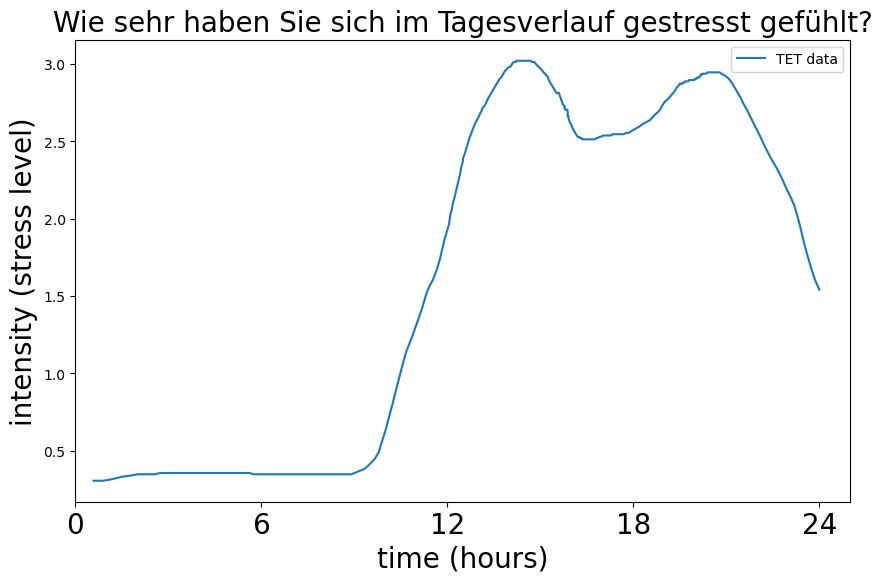

In [26]:
"""
Plot and save
"""
x_input = input('enter x (e.g: x8) : ')
y_input = input('enter y (e.g: y8) : ')
q = input('enter the question number (in the form q1, q2, q3, etc): ')
ind_input = input('enter the index of the question (in the form ind1, ind2, etc): ')

#to get the actual variables (and not just strings)
x = eval(x_input)
y = eval(y_input)
ind = eval(ind_input)

# Plotting
plt.figure(figsize=(10, 6))  
plt.plot(x*6, y, label='TET data')  # Plot using x_val*6 as x-axis and y_val as y-axis
plt.xlim(0, 25)
plt.xticks(range(0, 25, 6), fontsize=20)

# Adding title and labels
#plt.title(df_tet['Column1'].iloc[indices[3]])

plt.title(df_tet[qcol].iloc[ind], fontsize=20)
plt.xlabel('time (hours)',fontsize=20)

plt.ylabel('intensity (stress level)', fontsize=20)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

plt.savefig(os.path.join(fig_folder, ('TET_' + q +'_scaled.png')), bbox_inches='tight', dpi=300) 
plt.show()


enter x (e.g: x8) :  x8
enter y (e.g: y8) :  y8
enter the question number (in the form q1, q2, q3, etc):  q8
enter the index of the question (in the form ind1, ind2, etc):  ind8


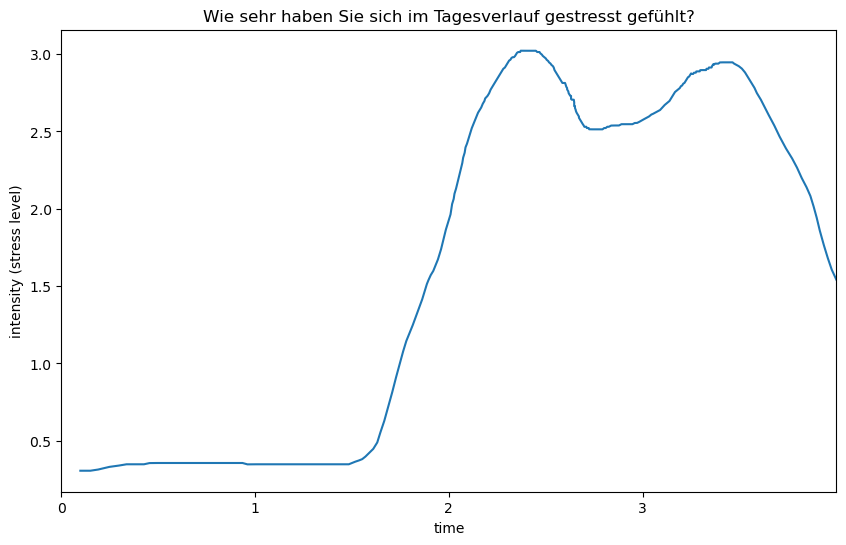

In [29]:
"""
Plot and save

for unscaled
"""
x_input = input('enter x (e.g: x8) : ')
y_input = input('enter y (e.g: y8) : ')
q = input('enter the question number (in the form q1, q2, q3, etc): ')
ind_input = input('enter the index of the question (in the form ind1, ind2, etc): ')

#to get the actual variables (and not just strings)
x = eval(x_input)
y = eval(y_input)
ind = eval(ind_input)

# Plotting
plt.figure(figsize=(10, 6))  
plt.plot(x, y, label='TET data, unscaled by time')  # Plot using x_val as x-axis and y_val as y-axis
plt.xlim(0, 4)
plt.xticks(range(0, 4, 1))

# Adding title and labels
#plt.title(df_tet['Column1'].iloc[indices[3]])

plt.title(df_tet[qcol].iloc[ind])
plt.xlabel('time')
plt.ylabel('intensity (stress level)')

plt.savefig(os.path.join(fig_folder, ('TET_' + q +'_unscaled.png'))) 
plt.show()
